# Wage Profile 
Code to accompany Lecture on  
Regression  
Jiaming Mao (<jmao@xmu.edu.cn>)  
<https://jiamingmao.github.io>

In [111]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from patsy import dmatrix
%matplotlib inline

data = pd.read_csv("Wage.csv")
data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [113]:
age = data.age
wage = data.wage
age_grid = np.arange(age.min(),age.max())

## Linear Regression

In [130]:
model = LinearRegression(fit_intercept=True)
model.fit(age[:,np.newaxis], wage)
print("slope:    ", model.coef_[0])
print("intercept:", model.intercept_)

slope:     0.707275928672
intercept: 81.7047354412


Text(0, 0.5, 'wage')

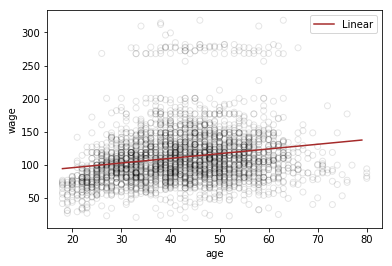

In [128]:
pred = model.predict(age_grid[:, np.newaxis])

plt.scatter(age, wage, facecolor='None', edgecolor='k', alpha=0.1, label='')
plt.plot(age_grid, pred, color='brown', label='Linear')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')

## Polynomial Regression

In [109]:
fit = np.polyfit(age, wage, 4)
model = np.poly1d(weights)
print(model)

            4            3          2
-3.204e-05 x + 0.006811 x - 0.5639 x + 21.25 x - 184.2


Text(0, 0.5, 'wage')

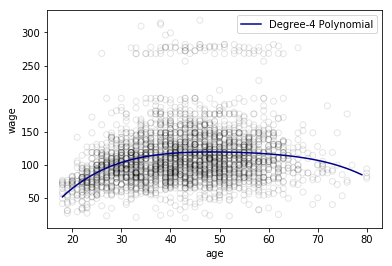

In [110]:
pred = model(age_grid)

plt.scatter(age, wage, facecolor='None', edgecolor='k', alpha=0.1, label='')
plt.plot(age_grid, pred, color='darkblue', label='Degree-4 Polynomial')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')


## Piecewise Constant Regression

In [103]:
age_cut, bins = pd.cut(age, 4, retbins=True, right=True)
age_dummies = pd.get_dummies(df_cut)
fit = sm.GLM(wage, age_dummies).fit()
fit.params

Text(0, 0.5, 'wage')

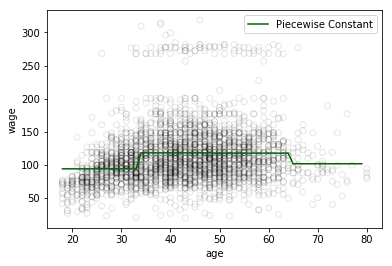

In [90]:
bin_mapping = np.digitize(age_grid, bins) 
age_grid_dummies = pd.get_dummies(bin_mapping) 
pred = fit.predict(age_grid_dummies)

plt.scatter(age, wage, facecolor='None', edgecolor='k', alpha=0.1, label='')
plt.plot(age_grid, pred, color='darkgreen', label='Piecewise Constant')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')

## Cubic Spline and Natural Cubic Spline

In [72]:
age_cs = dmatrix("bs(age, knots=(25,40,60), degree=3, include_intercept=False)",{"age": age},return_type='dataframe')
fit1 = sm.GLM(wage, age_cs).fit()
fit1.params

Intercept                                                            60.493714
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

In [73]:
age_ncs = dmatrix("cr(age, knots=(25,40,60))", {"age": age}, return_type='dataframe')
fit2 = sm.GLM(wage, age_ncs).fit()
fit2.params

Intercept                         78.153929
cr(age, knots=(25, 40, 60))[0]   -23.394386
cr(age, knots=(25, 40, 60))[1]     9.985675
cr(age, knots=(25, 40, 60))[2]    39.053020
cr(age, knots=(25, 40, 60))[3]    37.689735
cr(age, knots=(25, 40, 60))[4]    14.819884
dtype: float64

Text(0, 0.5, 'wage')

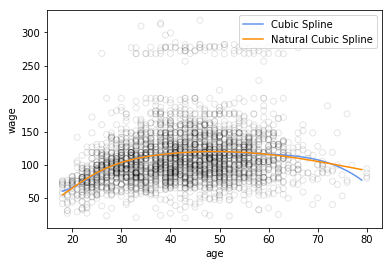

In [123]:
pred1 = fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)", {"age_grid": age_grid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("cr(age_grid, knots=(25,40,60))", {"age_grid": age_grid}, return_type='dataframe'))

plt.scatter(age, wage, facecolor='None', edgecolor='k', alpha=0.1, label='')
plt.plot(age_grid, pred1, color='cornflowerblue', label='Cubic Spline')
plt.plot(age_grid, pred2, color='darkorange', label='Natural Cubic Spline')
plt.legend()
plt.xlabel('age')
plt.ylabel('wage')